<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
 
 
 ### <center><h2> INGENIERÍA EN BIOTECNOLOGÍA</h2></center>
# <center><h1 style="color:red">GBI6 - BIOINFORMÁTICA</h1></center>

<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=400 height=300 />


  

**Paula Valeria Iñiguez Romero**

**03-08-2022**

In [97]:
!pip install tabulate
!pip install biopython
!pip install nglview
!pip install pgeocode

In [98]:
from tabulate import tabulate

# Lectura y visualización
from IPython.core.display import Image
from Bio.Seq import Seq
from Bio.SeqUtils import GC

from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

# Filogenia
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Proteínas
from Bio.PDB import *
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import nglview as nv
import ipywidgets

import warnings
warnings.filterwarnings('ignore')

import re

In [99]:
data=[["Nombre del dispositivo","LAB-C-E8"],
["Nombre completo del dispositivo","LAB-C-E8.ikiam.edu.ec"],
["Procesador","Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz   3.40 GHz"],
["RAM instalada","8.00 GB"],
["Identificador de dispositivo","34CA5CF2-2EA4-4E9C-A991-861F33088D3D"],
["Id. del producto","00330-80000-00000-AA197"],
["Tipo de sistema","Sistema operativo de 64 bits, procesador basado en x64"]
]

In [100]:
col_names = ["especificidades del dispositivo", "Points"]


In [101]:
print(tabulate(data, headers=col_names))

especificidades del dispositivo    Points
---------------------------------  ------------------------------------------------------
Nombre del dispositivo             LAB-C-E8
Nombre completo del dispositivo    LAB-C-E8.ikiam.edu.ec
Procesador                         Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz   3.40 GHz
RAM instalada                      8.00 GB
Identificador de dispositivo       34CA5CF2-2EA4-4E9C-A991-861F33088D3D
Id. del producto                   00330-80000-00000-AA197
Tipo de sistema                    Sistema operativo de 64 bits, procesador basado en x64


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 



print(tabulate(data, headers=col_names))

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```map_science```: para su data replique el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb), donde los puntos resaltados son al menos 5 ciudades
iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [108]:
import miningscience as msc
import inspect 

help(msc.download_pubmed)
print(inspect.getsource(msc.download_pubmed))

help(msc.map_science)
print(inspect.getsource(msc.map_science))

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Función que extrae listado de artículos desde pubmed

def download_pubmed(keyword): 
    """ Función que extrae listado de artículos desde pubmed """
    
     
    from Bio import Entrez
 
    
    Entrez.email = "paula.iniguez@est.ikiam.edu.ec"
    Entr=Entrez.read(Entrez.esearch(db="pubmed",
                        term= keyword,
                        usehistory="y"))
    
    webenv=Entr["WebEnv"]
    query_key=Entr["QueryKey"]
    hand1=Entrez.efetch(db="pubmed",
                      rettype='medline',
                      retmode="text",
                      retstart=0,
                      retmax=543, webenv=webenv, query_key=query_key)
    out_hand1 = open(keyword+".txt", "w")
    p=hand1.read()
    out_hand1.write(p)
    out_hand1.close()
    hand1.close()
    return p

Help on function map_science in module miningscience:

map_science()

def map_science():
    import os
    os.getcwd


## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [103]:
# Escriba aquí su código para el ejercicio 2
Biohydrogen = msc.download_pubmed("Biohydrogen")
print('El número artículos para KEYWORD es:', len(Biohydrogen))
AMP = msc.download_pubmed("AMP")
print('El número artículos para KEYWORD es:', len(AMP))

El número artículos para KEYWORD es: 2142996
El número artículos para KEYWORD es: 2580436


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```map_science``` para: 

- Visualizar un mapa para cada data descargada en el ejercicio 2.
- Guardar los mapas en la carpeta ```img```

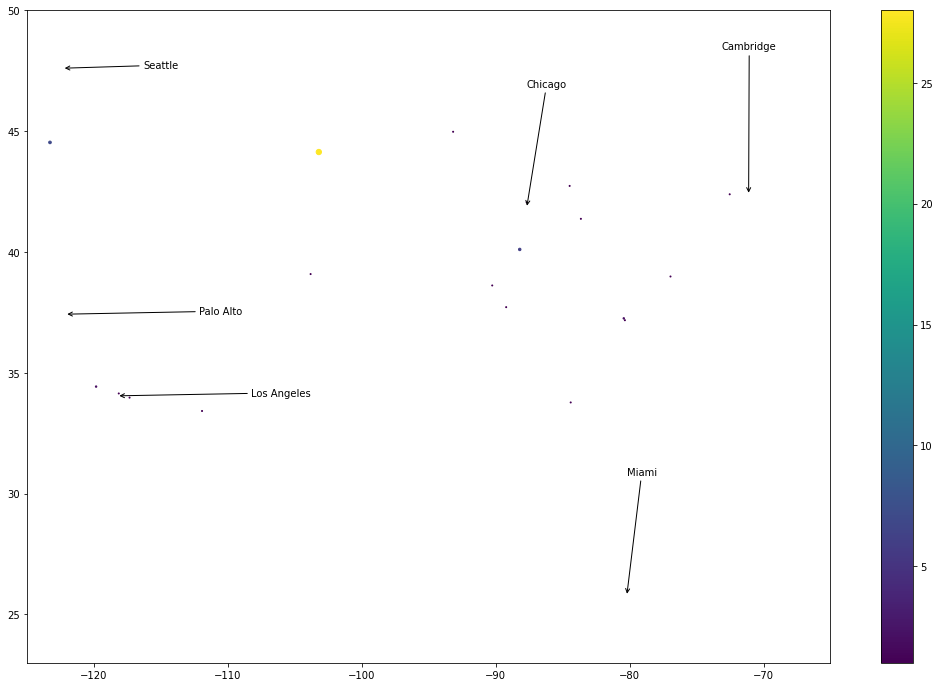

dict_values(['Amherst', 'College Park', 'Blacksburg', 'Blacksburg', 'Atlanta', 'Bowling Green', 'East Lansing', 'Saint Paul', 'Rapid City', 'Evanston', 'Urbana', 'Carbondale', 'Saint Louis', 'Usaf Academy', 'Tempe', 'Pasadena', 'Riverside', 'Santa Barbara', 'Honolulu', 'Corvallis']) [1, 1, 2, 1, 1, 1, 1, 1, 28, 1, 6, 1, 1, 1, 1, 1, 1, 2, 1, 7]


In [133]:
with open("Biohydrogen.txt") as f:
    my_text = f.read()
my_text= re.sub(r'\n\s{6}', ' ', my_text)

zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)
unique_zipcodes = list(set(zipcodes))
unique_zipcodes.sort()


import pgeocode
zip_lat_long = pgeocode.Nominatim('US').query_postal_code(unique_zipcodes)
zip_lat_long = zip_lat_long.to_dict()

zip_code = zip_lat_long['postal_code'].values()
zip_long = zip_lat_long['longitude'].values()
zip_lat = zip_lat_long['latitude'].values()
zip_count = []
for i in zip_lat_long['postal_code'].values():
    a = zipcodes.count(i)
    zip_count.append(a)


import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()

plt.xlim(-125,-65)
plt.ylim(23, 50)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('Los Angeles', xy = (-118.25, 34.05), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Palo Alto', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Cambridge', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('Chicago', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Seattle', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Miami', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()
print(zip_lat_long['place_name'].values(), zip_count)

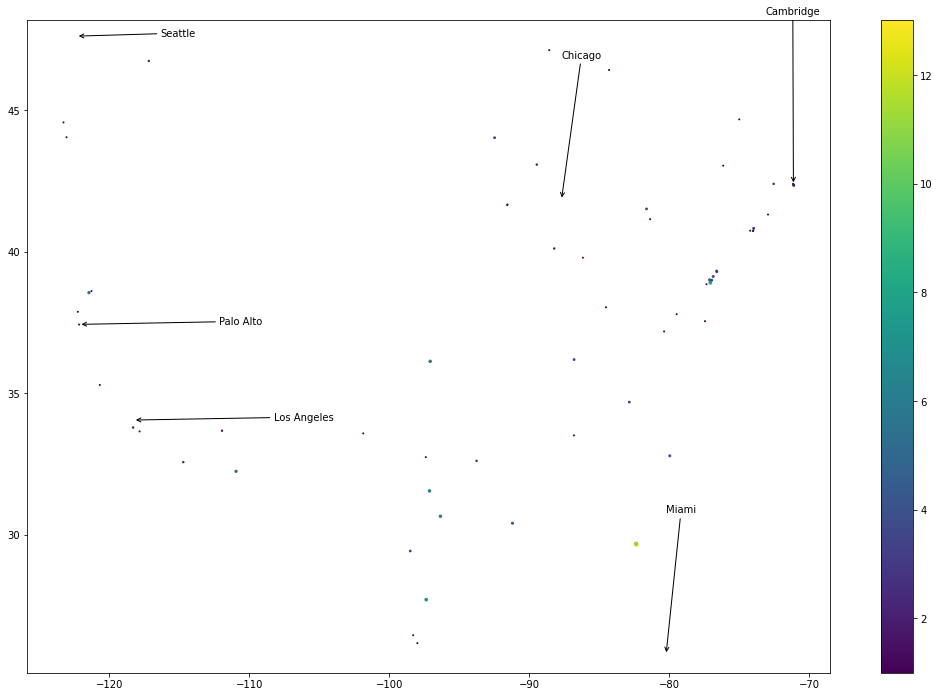

dict_values(['Amherst', 'Boston', 'Boston', 'Cambridge', 'Cambridge', 'New Haven', 'Newark', 'New York', 'New York', 'New York', 'New York', 'Syracuse', 'Potsdam', 'Washington', 'Washington', 'Washington', 'Laurel', 'College Park', 'Bethesda', 'Baltimore', 'Baltimore', 'Baltimore', 'Fairfax', 'Richmond', 'Blacksburg', 'Lexington', 'Charleston', 'Clemson', 'Gainesville', 'Gainesville', 'Birmingham', 'Nashville', 'Lexington', 'Cleveland', 'Kent', 'Indianapolis', 'Sault Sainte Marie', 'Houghton', 'Iowa City', 'Iowa City', 'Madison', 'Rochester', 'Urbana', 'Baton Rouge', 'Shreveport', 'Stillwater', 'Fort Worth', 'Waco', 'College Station', 'Jbsa Ft Sam Houston', 'Corpus Christi', 'Edinburg', 'Weslaco', 'Lubbock', 'Phoenix', 'Somerton', 'Tucson', 'Los Angeles', 'Irvine', 'San Luis Obispo', 'Stanford', 'Berkeley', 'Rancho Cordova', 'Sacramento', 'Corvallis', 'Eugene', 'Pullman']) [2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 8, 4, 3, 4, 2, 1, 3, 1, 1, 1, 1, 4, 3, 13, 11, 1, 3, 1, 3, 1, 1, 1, 

In [134]:
with open("AMP.txt") as f:
    my_text = f.read()
my_text= re.sub(r'\n\s{6}', ' ', my_text)

zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)
unique_zipcodes = list(set(zipcodes))
unique_zipcodes.sort()


import pgeocode
zip_lat_long = pgeocode.Nominatim('US').query_postal_code(unique_zipcodes)
zip_lat_long = zip_lat_long.to_dict()

zip_code = zip_lat_long['postal_code'].values()
zip_long = zip_lat_long['longitude'].values()
zip_lat = zip_lat_long['latitude'].values()
zip_count = []
for i in zip_lat_long['postal_code'].values():
    a = zipcodes.count(i)
    zip_count.append(a)


import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('Los Angeles', xy = (-118.25, 34.05), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Palo Alto', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Cambridge', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('Chicago', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Seattle', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Miami', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()
print(zip_lat_long['place_name'].values(), zip_count)

In [126]:
zip_lat_long = pgeocode.Nominatim('US').query_postal_code(unique_zipcodes)
print(zip_lat_long)

   postal_code country_code      place_name     state_name state_code  \
0        01003           US         Amherst  Massachusetts         MA   
1        02115           US          Boston  Massachusetts         MA   
2        02118           US          Boston  Massachusetts         MA   
3        02139           US       Cambridge  Massachusetts         MA   
4        02140           US       Cambridge  Massachusetts         MA   
..         ...          ...             ...            ...        ...   
62       95670           US  Rancho Cordova     California         CA   
63       95817           US      Sacramento     California         CA   
64       97331           US       Corvallis         Oregon         OR   
65       97403           US          Eugene         Oregon         OR   
66       99164           US         Pullman     Washington         WA   

   county_name  county_code community_name  community_code  latitude  \
0    Hampshire         15.0            NaN         

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*


## Ejercicio 5 [2 puntos]

Para algún **gen de interés** (podría usar [Lista de genes por tipología](https://www.genome.jp/kegg/pathway.html#metabolism)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [ ]:
# Escriba aquí su código para el ejercicio 6



**Escriba aquí la interpretación del árbol**

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
